<a href="https://colab.research.google.com/github/Paupau20/Colab/blob/main/Tarea_Explore_your_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io as io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [80]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [81]:
#It returns a number of rows and columns in a dataset.
df.shape

(435742, 13)

In [82]:
#It returns a number of null values in each column.
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [83]:
#It returns range, column, number of non-null objects of each column, datatype and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [84]:
#It results in a number of non null values in each column.
df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [85]:
#count: Count number of non-NA/null observations
#mean: Mean of the values
#std:Standard deviation of the observations
#min: Minimum of the values in the object
#max: Maximum of the values in the object
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [86]:
# Cleaning up the data
df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True) #dropping columns that aren't required
df = df.dropna(subset=['date']) # dropping rows where no date is available
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [88]:
# displaying columns
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

In [89]:
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
df.type = df.type.replace(types)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [91]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [93]:
df['year'] = df.date.dt.year
df.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


In [101]:
#Definimos lascolumnas que nos interesan guardar
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

from sklearn.impute import SimpleImputer
# usamos SimpleImputer para rellenar los valores faltantes
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[cols] = imputer.fit_transform(df[cols])
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990


In [102]:
#Checamos los valores
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

In [106]:
statewise_so2 = df[['so2','state']].groupby('state', as_index=False).median().sort_values(by='so2')
statewise_so2.head(10)

,state,so2
22,Nagaland,2.0
21,Mizoram,2.0
20,Meghalaya,2.0
1,Arunachal Pradesh,2.5
12,Himachal Pradesh,3.0
16,Kerala,4.2
29,Telangana,5.0
23,Odisha,5.0
13,Jammu & Kashmir,5.0
0,Andhra Pradesh,5.0


<AxesSubplot:xlabel='state'>

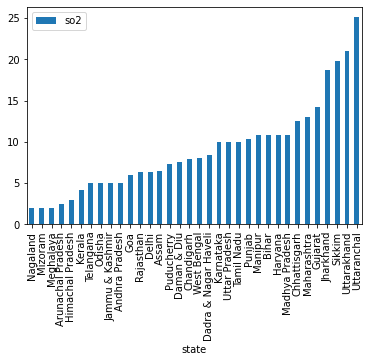

In [107]:
statewise_so2.plot(kind='bar',x='state',y='so2')

In [109]:
statewise_no2 = df[['no2','state']].groupby('state', as_index=False).median().sort_values(by='no2')
statewise_no2.head(10)

,state,no2
1,Arunachal Pradesh,5.0
21,Mizoram,5.0
22,Nagaland,7.0
20,Meghalaya,10.0
9,Goa,11.6
24,Puducherry,13.0
13,Jammu & Kashmir,13.0
12,Himachal Pradesh,13.9
16,Kerala,14.0
2,Assam,14.0


<AxesSubplot:xlabel='state'>

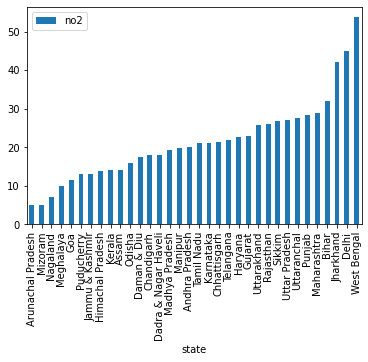

In [110]:
statewise_no2.plot(kind='bar',x='state',y='no2')

In [112]:
state_wise_spm = df[['spm','state']].groupby('state', as_index=False).median().sort_values(by='spm')
state_wise_spm.head(5)

,state,spm
27,Sikkim,75.0
19,Manipur,120.5
24,Puducherry,191.0
9,Goa,199.0
7,Daman & Diu,200.5


<AxesSubplot:xlabel='state'>

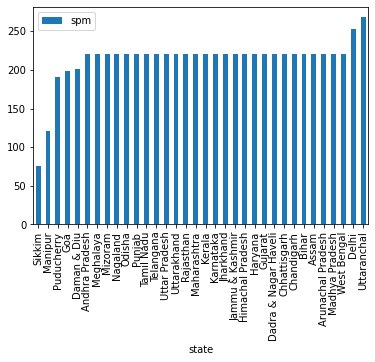

In [113]:
state_wise_spm.plot(kind='bar',x='state',y='spm')

In [115]:
andhra = df[df['state']=='Andhra Pradesh']
year_wise_AP = andhra[['so2','no2','rspm','spm','year']].groupby('year').median()
year_wise_AP.head()

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


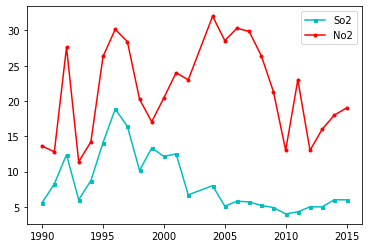

In [128]:
plt.plot(year_wise_AP['so2'],'-sc',markersize = 3, label='So2')
plt.plot(year_wise_AP['no2'],'-or', markersize = 3, label='No2')

plt.legend(loc='upper right')

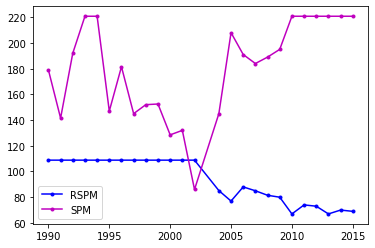

In [129]:
# crear la gráfica
plt.plot(year_wise_AP['rspm'], '-ob', markersize=3, label='RSPM')
plt.plot(year_wise_AP['spm'], '-om', markersize=3, label='SPM')

# agregar la leyenda
plt.legend(loc='lower left')